# ARTIGOI: MELHORIA NA PREVISÃO DE IRRADIÂNCIA SOLAR USANDO TÉCNICAS DE DEEP LEARNING

Integrantes:
*   RA 1700737 Grasiely Lima Pastori Vieira
*   RA 1901025 Larissa de Almeida Ribeiro
*   RA 2401325 Edilson Claudino da Silva
*   RA 2401327 Allison Melo dos Santos
*   RA 2402439 Leticia Santos Rosa







## Proposta de Melhoria

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from sklearn.neural_network import MLPRegressor
!pip install pyswarm
from pyswarm import pso
!pip install PyWavelets
from pywt import wavedec
!pip install deap
from deap import base, creator, tools, algorithms
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neural_network import MLPClassifier
import multiprocessing
from sklearn.preprocessing import MinMaxScaler
import random

In [4]:
# Carregar os dados
df = pd.read_csv('/content/global_horizontal_means.csv', delimiter=';')

In [ ]:
# Preparar os dados
X = df.drop(['ID', 'COUNTRY', 'ANNUAL'], axis=1)
y = df['ANNUAL']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Melhoria na Arquitetura Utilizando o Modelo Híbrido CNN-LSTM (Convolutional Neural Networks - Long Short-Term Memory Networks)

In [ ]:
# Redimensionar para o formato adequado para CNN-LSTM (n_amostras, n_tempos, n_features)
X_scaled_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo CNN-LSTM
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Treinar o modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 23988526.0000 - mae: 4879.1958 - val_loss: 23506344.0000 - val_mae: 4829.4927
Epoch 2/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 23304216.0000 - mae: 4808.3477 - val_loss: 22826962.0000 - val_mae: 4758.6260
Epoch 3/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 22647932.0000 - mae: 4739.6460 - val_loss: 22160702.0000 - val_mae: 4688.0942
Epoch 4/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 21974584.0000 - mae: 4668.2539 - val_loss: 21505208.0000 - val_mae: 4617.6567
Epoch 5/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 21354660.0000 - mae: 4601.1255 - val_loss: 20860060.0000 - val_mae: 4547.2725
Epoch 6/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 20675722.0000 - mae: 4526.7852 - val_loss: 20224828.0000 - val_mae: 4476.8750
Epoch 7/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 20041468.0000 - mae: 4456.2695 - val_loss: 19599708.0000 - val_mae: 4406.5015
Epoch 

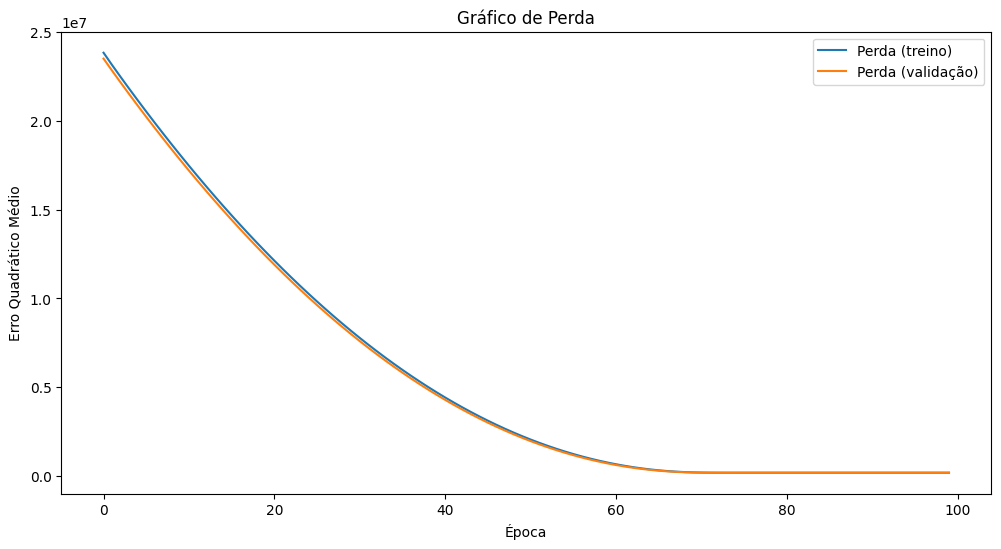

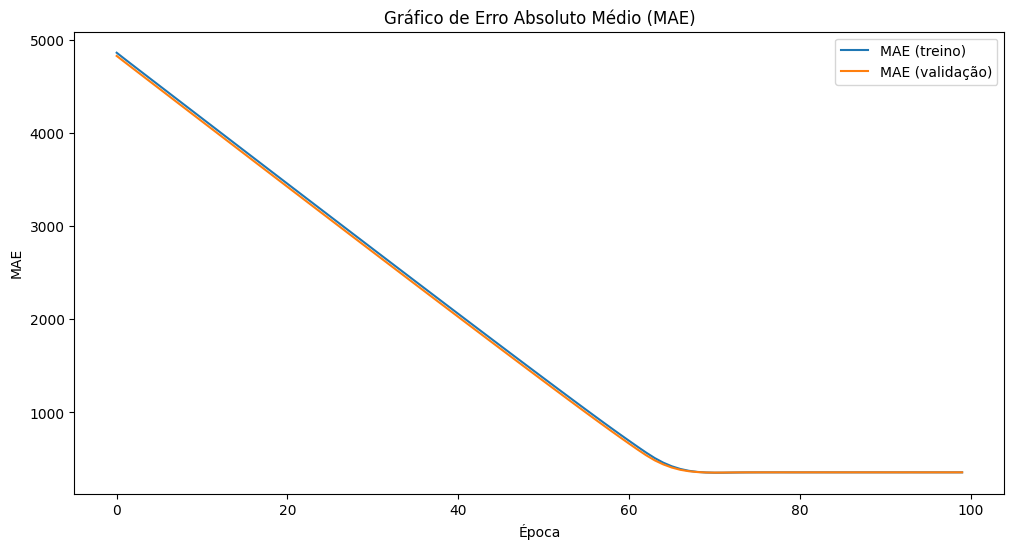

In [ ]:
# Funções para plotar os gráficos
def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Perda (treino)')
    plt.plot(history.history['val_loss'], label='Perda (validação)')
    plt.title('Gráfico de Perda')
    plt.xlabel('Época')
    plt.ylabel('Erro Quadrático Médio')
    plt.legend()
    plt.show()

def plot_metric(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='MAE (treino)')
    plt.plot(history.history['val_mae'], label='MAE (validação)')
    plt.title('Gráfico de Erro Absoluto Médio (MAE)')
    plt.xlabel('Época')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

# Plotar os gráficos
plot_loss(history)
plot_metric(history)

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Erro Quadrático Médio (MSE) no teste: {test_loss:.2f}")
print(f"Erro Absoluto Médio (MAE) no teste: {test_mae:.2f}")

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o R² para avaliar a qualidade da previsão
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Quadrático Médio (MSE) no teste: 183156.97
Erro Absoluto Médio (MAE) no teste: 355.55
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Coeficiente de Determinação (R²): -0.0000


## Incorporando Técnicas de Redução de Ruído Utilizando a Wavelet Decomposition

In [ ]:
# Aplicar a Decomposição Wavelet
def apply_wavelet(data, wavelet='db1', level=2):
    coeffs = wavedec(data, wavelet, level=level)
    return np.concatenate(coeffs)

X_wavelet = X.apply(lambda x: apply_wavelet(x), axis=1)

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_wavelet, y, test_size=0.2, random_state=42)

# Converter X_train e X_test em arrays e remodelar
X_train = np.vstack(X_train.to_numpy())
X_test = np.vstack(X_test.to_numpy())

# Criar e treinar o modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Erro Quadrático Médio (MSE): 0.37
Coeficiente de Determinação (R²): 1.0000


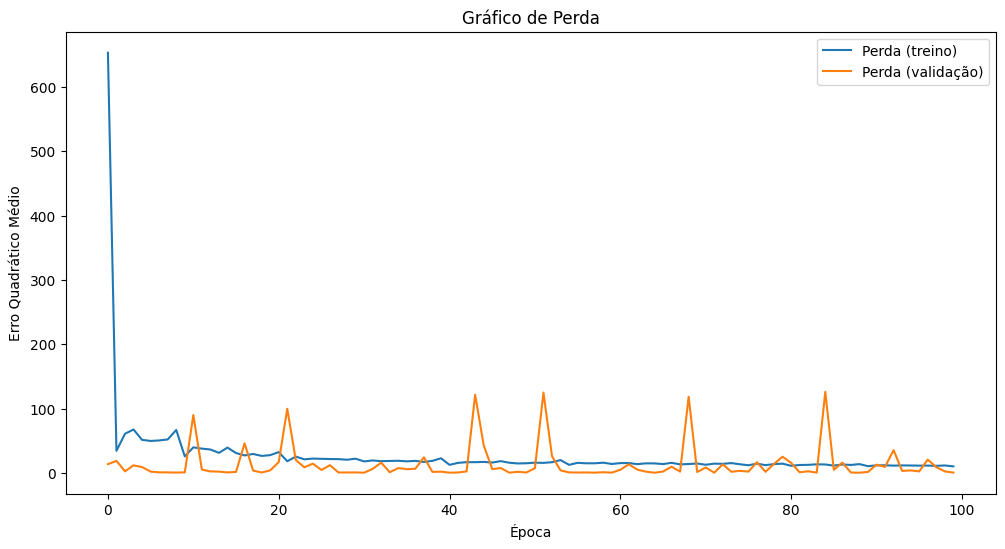

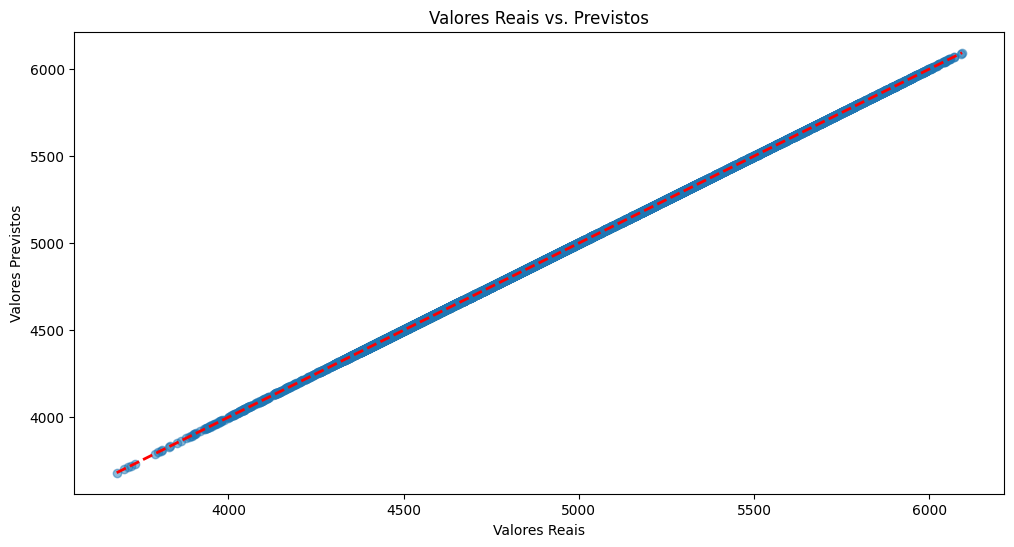

In [ ]:
# Plotar o gráfico de perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda (treino)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.title('Gráfico de Perda')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio')
plt.legend()
plt.show()

# Plotar os resultados da previsão
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos')
plt.show()

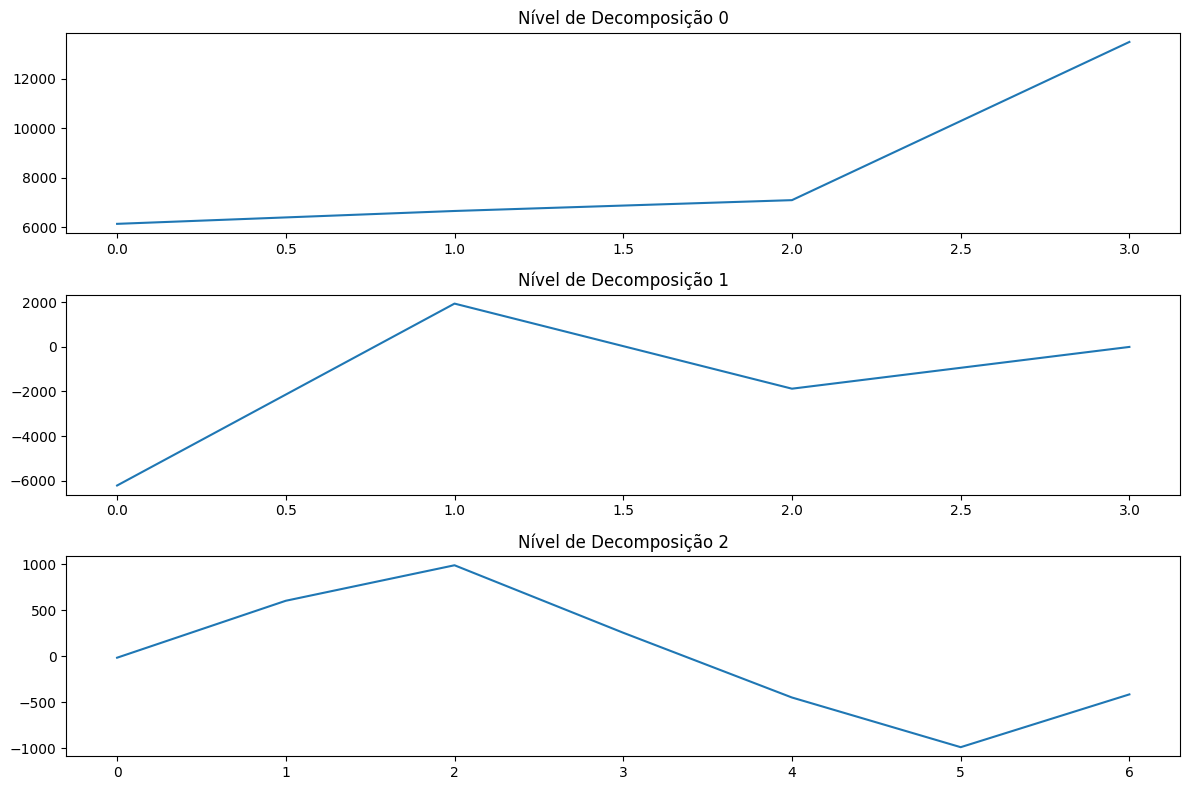

In [ ]:
# Visualizar a decomposição wavelet para uma amostra
sample = X.iloc[0]
coeffs = wavedec(sample, 'db1', level=2)

plt.figure(figsize=(12, 8))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i+1)
    plt.plot(coeff)
    plt.title(f'Nível de Decomposição {i}')
plt.tight_layout()
plt.show()

## Expandindo as Métricas de Avaliação Utilizando MAPE (Mean Absolute Percentage Error) e o Concordance Index (d)

In [13]:
# Selecionando as colunas relevantes (excluindo ID, COUNTRY, LON, LAT)
data = df.iloc[:, 5:].values

# Normalizando os dados
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Dividindo em treino e teste
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

In [15]:
# Função MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Função Concordance Index
def concordance_index(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((np.abs(y_true - mean_y_true) + np.abs(y_pred - mean_y_true)) ** 2)
    return 1 - numerator / denominator

In [16]:
# Simulando previsões com a média dos valores das colunas
def predict_with_mean(X):
    return np.mean(X, axis=1)

# Fazendo previsões no conjunto de teste
y_pred = predict_with_mean(X_test)
y_true = X_test[:, 0]  # Usando a primeira coluna como exemplo de valores reais

In [17]:
# Calculando MAPE e Concordance Index
mape_value = mape(y_true, y_pred)
concordance_value = concordance_index(y_true, y_pred)

print(f'MAPE: {mape_value:.2f}%')
print(f'Concordance Index: {concordance_value:.2f}')

MAPE: 82.89%
Concordance Index: 0.69


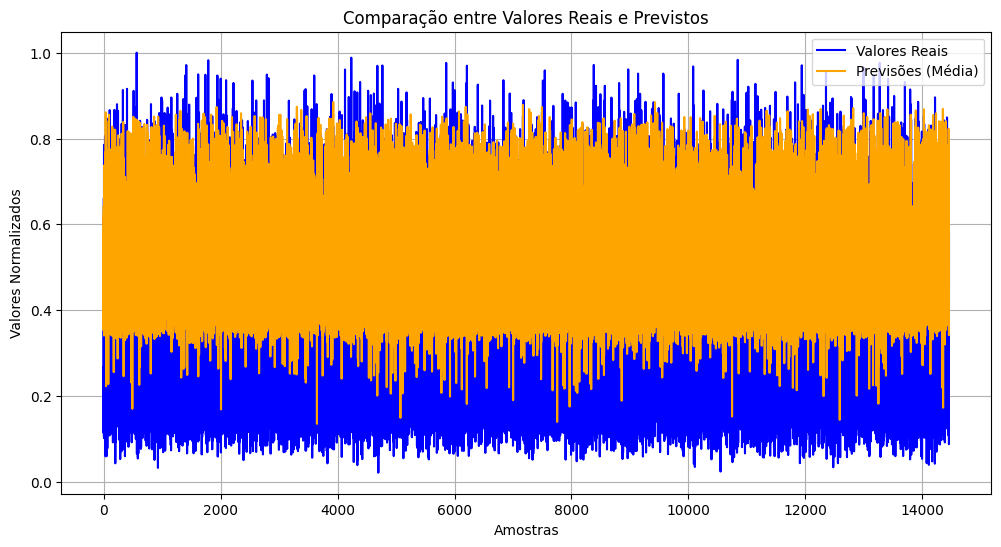

In [18]:
# Plotando gráfico para ajudar na análise visual entre valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_true)), y_true, label='Valores Reais', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Previsões (Média)', color='orange')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Amostras')
plt.ylabel('Valores Normalizados')
plt.legend()
plt.grid(True)
plt.show()

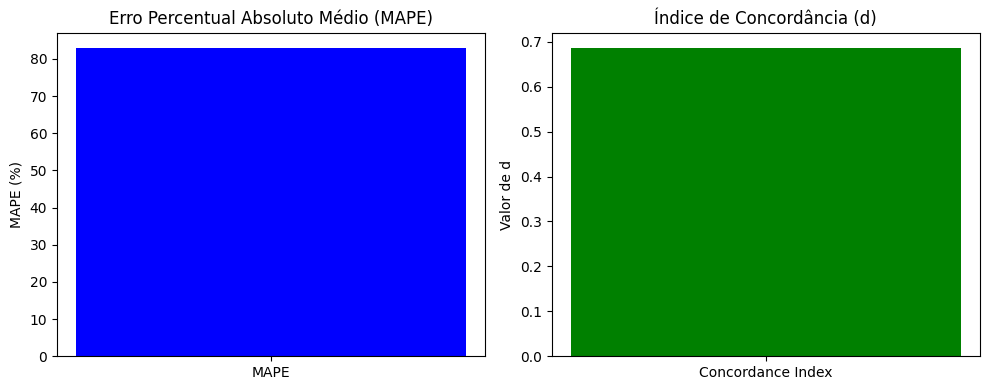

In [19]:
# Visualização dos resultados em gráficos de barras
plt.figure(figsize=(10, 4))

# Gráfico do MAPE
plt.subplot(1, 2, 1)
plt.bar(['MAPE'], [mape_value], color='blue')
plt.title('Erro Percentual Absoluto Médio (MAPE)')
plt.ylabel('MAPE (%)')

# Gráfico do Concordance Index (d)
g = plt.subplot(1, 2, 2)
g.bar(['Concordance Index'], [concordance_value], color='green')
g.title.set_text('Índice de Concordância (d)')
g.set_ylabel('Valor de d')

plt.tight_layout()
plt.show()

## Otimizando com Algoritmos Metaheurísticos: GA (Genetic Algorithm) e PSO (Particle Swarm Optimization)

In [5]:
# Selecionando as colunas relevantes (excluindo ID, COUNTRY, LON, LAT)
data = df.iloc[:, 5:].values

# Normalizando os dados
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Função de fitness simulada (minimização do erro)
def fitness_function(params):
    return np.sum(params**2)

# Algoritmo Genético
class GeneticAlgorithm:
    def __init__(self, pop_size, n_gen, mutation_rate):
        self.pop_size = pop_size
        self.n_gen = n_gen
        self.mutation_rate = mutation_rate
        self.population = np.random.rand(pop_size, data_scaled.shape[1])  # Inicializando população aleatória

    def run(self):
        fitness_history = []
        for generation in range(self.n_gen):
            fitness_scores = np.array([fitness_function(ind) for ind in self.population])
            fitness_history.append(np.min(fitness_scores))
            parents = self.selection(fitness_scores)
            offspring = self.crossover(parents)
            self.mutate(offspring)
            self.population = offspring
        return fitness_history

    def selection(self, fitness_scores):
        idx = np.argsort(fitness_scores)[:self.pop_size // 2]
        return self.population[idx]

    def crossover(self, parents):
        offspring = []
        for _ in range(self.pop_size):
            p1, p2 = parents[np.random.choice(parents.shape[0], 2, replace=False)]
            child = (p1 + p2) / 2
            offspring.append(child)
        return np.array(offspring)

    def mutate(self, offspring):
        for i in range(len(offspring)):
            if random.random() < self.mutation_rate:
                offspring[i] += np.random.normal(0, 0.1, offspring[i].shape)

# Executando o Algoritmo Genético
ga = GeneticAlgorithm(pop_size=100, n_gen=50, mutation_rate=0.1)
ga_fitness_history = ga.run()

In [7]:
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.random.rand(*position.shape) * 0.1
        self.best_position = position.copy()
        self.best_value = fitness_function(position)

class PSO:
    def __init__(self, n_particles, n_iterations):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.particles = [Particle(np.random.rand(data_scaled.shape[1])) for _ in range(n_particles)]
        self.global_best_position = self.particles[0].best_position.copy()
        self.global_best_value = float('inf')

    def optimize(self):
        fitness_history_pso = []
        for _ in range(self.n_iterations):
            for particle in self.particles:
                inertia = 0.5 * particle.velocity
                cognitive = 1.5 * np.random.rand() * (particle.best_position - particle.position)
                social = 1.5 * np.random.rand() * (self.global_best_position - particle.position)
                particle.velocity = inertia + cognitive + social
                particle.position += particle.velocity

                fitness_value = fitness_function(particle.position)

                if fitness_value < particle.best_value:
                    particle.best_value = fitness_value
                    particle.best_position = particle.position.copy()

                if fitness_value < self.global_best_value:
                    self.global_best_value = fitness_value
                    self.global_best_position = particle.position.copy()

            # Armazenando o melhor valor de cada iteração para visualização posterior
            fitness_history_pso.append(self.global_best_value)

        return fitness_history_pso

# Executando o PSO
pso = PSO(n_particles=100, n_iterations=50)
pso_fitness_history = pso.optimize()

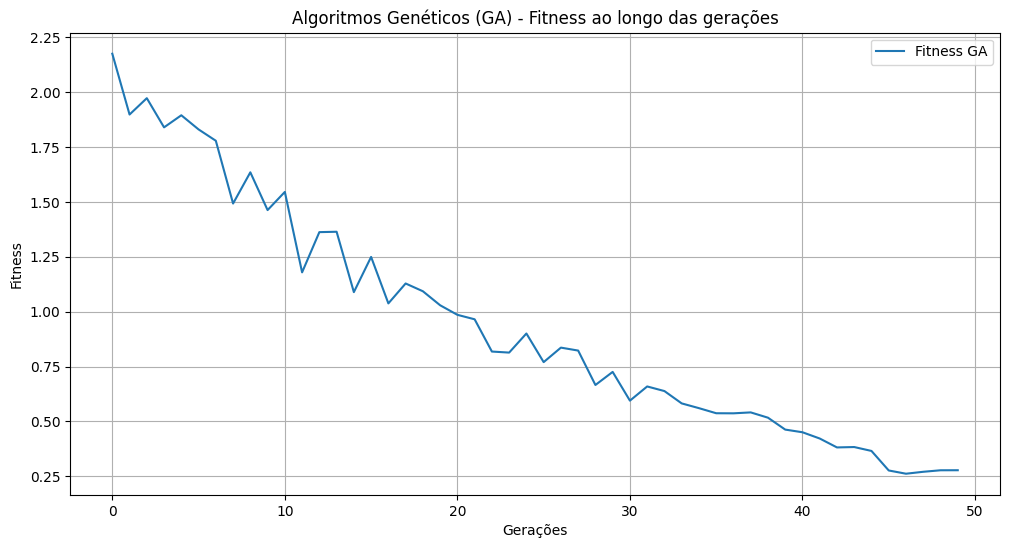

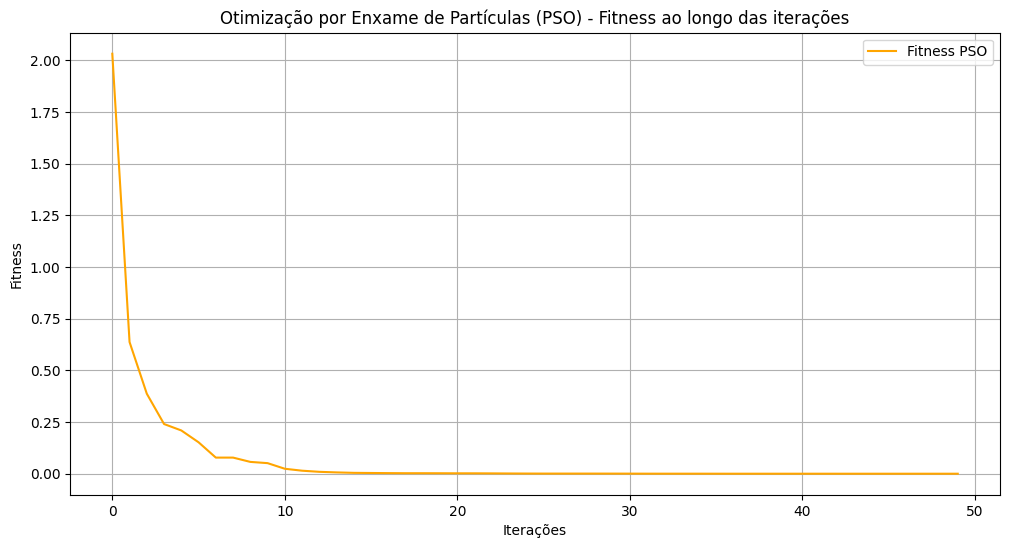

In [8]:
# Plotando os resultados do Algoritmo Genético (GA)
plt.figure(figsize=(12, 6))
plt.plot(ga_fitness_history, label='Fitness GA')
plt.title('Algoritmos Genéticos (GA) - Fitness ao longo das gerações')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()

# Plotando os resultados do Otimização por Enxame de Partículas (PSO)
plt.figure(figsize=(12, 6))
plt.plot(pso_fitness_history, label='Fitness PSO', color='orange')
plt.title('Otimização por Enxame de Partículas (PSO) - Fitness ao longo das iterações')
plt.xlabel('Iterações')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()